In [1]:
# %pip install altair_saver seaborn altair

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
import pandas as pd
import altair as alt
from altair_saver import save as alt_save

pd.set_option('display.max_columns', None)

## thesis

1. доля аналогична ген. совокупности
1. Преимущество для игроков одиночных видов спорта, таких как теннис или бокс, состоит в том, что человечество состоит, возможно, из 10 % левшей и 90 % правшей, следовательно, левша играет 90 % своих игр против правшей и имеет опыт перед таким соперником. Правша также 90 % игр проводит против другого правши и к встрече с левшой менее подготовлен. Когда левша встречается с левшой, они оба, вероятно, будут иметь одинаковый уровень практики друг против друга, такой же, как имеет правша. Этим объясняется непропорционально большое количество левшей в тех видах спорта, где спортсмены встречаются один на один, в то время как в других видах, например в гольфе, преимущество асимметричной руки отсутствует.
2. левшам труднее освоить хорошую технику броска => их точность д.б. ниже
2. в частности против левшей труднее защищаться => больше процент и больше собранных фолов

## questions 
1. + как менялось кол-во левшей по сезонам? как менялось их игрвое время?
2. + как менялись очки\подборы\передачи в среднем? как менялись рекорды сезона и кому принедлежат?
3. + какова точность с игры\линии\трёхи? кто точнее левши или правши? есть ли стат. значимость?
4. + как менялось количество фолов для всех игроков и отдельно для левшей?
5. + сравнить распределение роста\веса\возраста для последнего сезона?
6. + в каких командах больше\меньше всего левшей и больше\меньше игровых минут?

# load data

In [3]:
df_stats = pd.read_parquet('../all_players_seasons_stats_13062023.pqt')
print(df_stats.shape)
df_stats = df_stats.query('(SEASON_ID >= "2000-01") and (TEAM_ID != 0)').copy()
df_stats['total_min_in_season'] = df_stats.groupby('SEASON_ID').MIN.transform('sum')
print(df_stats.shape)
df_stats.head()

(29176, 27)
(12548, 28)


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,total_min_in_season
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1629059,2018-19,00,1610612756,PHX,21.0,53,16.0,958.0,114,290,0.393,39.0,132.0,0.295,37,47,0.787,12.0,86.0,98.0,127,32.0,7.0,69.0,109,304,594468.0
1,1629059,2019-20,00,1610612756,PHX,22.0,55,3.0,719.0,72,181,0.398,25.0,71.0,0.352,50,71,0.704,16.0,74.0,90.0,115,24.0,4.0,38.0,54,219,512062.0
0,1629140,2018-19,00,1610612747,LAL,24.0,24,0.0,372.0,65,110,0.591,0.0,2.0,0.0,27,48,0.563,48.0,51.0,99.0,13,8.0,7.0,16.0,62,157,594468.0
1,1629140,2019-20,00,1610612764,WAS,25.0,15,6.0,180.0,19,34,0.559,0.0,2.0,0.0,7,13,0.538,24.0,40.0,64.0,8,1.0,8.0,5.0,16,45,512062.0
0,1630624,2021-22,00,1610612752,NYK,22.0,2,0.0,8.0,0,2,0.0,0.0,0.0,0.0,0,0,0.0,1.0,0.0,1.0,1,1.0,0.0,1.0,1,0,593764.0


In [4]:
df_players = pd.read_pickle('nba2basketref_2000_2023.pkl.zip', compression='zip')
print(df_players.shape)
df_players.drop_duplicates(inplace=True)
print(df_players.shape)
df_players.head()

(2271, 25)
(2271, 25)


,id,full_name,first_name,last_name,is_active,born_year_x,full_name_year,basketref_name_year,basketref_name_year_lower,player_name,player_link,player_pos,player_height,player_weight,player_born,player_college,from_year,to_year,fpath,cnt_shoots_elements,shoots,hand,born_year_y,name_year,player_name_year_lower
0,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False,1969,Mahmoud Abdul-Rauf - 1969,Mahmoud Abdul-Rauf - 1969,mahmoud abdul-rauf - 1969,Mahmoud Abdul-Rauf,https://www.basketball-reference.com/players/a...,G,6-1,162,"March 9, 1969",LSU,1991,2001,data/players/abdulma02.html,1,\n right\n,r,1969,Mahmoud Abdul-Rauf - 1969,mahmoud abdul-rauf - 1969
1,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False,1974,Tariq Abdul-Wahad - 1974,Tariq Abdul-Wahad - 1974,tariq abdul-wahad - 1974,Tariq Abdul-Wahad,https://www.basketball-reference.com/players/a...,F,6-6,223,"November 3, 1974","Michigan, San Jose State",1998,2003,data/players/abdulta01.html,1,\n right\n,r,1974,Tariq Abdul-Wahad - 1974,tariq abdul-wahad - 1974
2,949,Shareef Abdur-Rahim,Shareef,Abdur-Rahim,False,1976,Shareef Abdur-Rahim - 1976,Shareef Abdur-Rahim - 1976,shareef abdur-rahim - 1976,Shareef Abdur-Rahim,https://www.basketball-reference.com/players/a...,F,6-9,225,"December 11, 1976",California,1997,2008,data/players/abdursh01.html,1,\n right\n,r,1976,Shareef Abdur-Rahim - 1976,shareef abdur-rahim - 1976
3,203518,Alex Abrines,Alex,Abrines,False,1993,Alex Abrines - 1993,Álex Abrines - 1993,álex abrines - 1993,Álex Abrines,https://www.basketball-reference.com/players/a...,G-F,6-6,200,"August 1, 1993",,2017,2019,data/players/abrinal01.html,1,\n right\n,r,1993,Álex Abrines - 1993,álex abrines - 1993
4,1630173,Precious Achiuwa,Precious,Achiuwa,True,1999,Precious Achiuwa - 1999,Precious Achiuwa - 1999,precious achiuwa - 1999,Precious Achiuwa,https://www.basketball-reference.com/players/a...,F,6-8,225,"September 19, 1999",Memphis,2021,2023,data/players/achiupr01.html,1,\n right\n,r,1999,Precious Achiuwa - 1999,precious achiuwa - 1999


In [5]:
df_cpi = pd.read_pickle('../last_20_seasons_players_info_20230620.pickle.zip', compression='zip')
print(df_cpi.shape)
df_cpi.head(2)

(2271, 33)


,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,3,Grant,Long,Grant Long,"Long, Grant",G. Long,grant-long,1966-03-12T00:00:00,Eastern Michigan,USA,Eastern Michigan/USA,6-9,240,15,,Forward,Inactive,N,0,,,,,grant_long,1988,2002,N,Y,Y,1988,2,33,NaN
0,15,Eric,Piatkowski,Eric Piatkowski,"Piatkowski, Eric",E. Piatkowski,eric-piatkowski,1970-09-30T00:00:00,Nebraska,USA,Nebraska/USA,6-7,215,14,52,Guard-Forward,Inactive,N,1610612746,Clippers,LAC,clippers,Los Angeles,eric_piatkowski,1994,2007,N,Y,Y,1994,1,15,NaN


In [6]:
df = (
    pd.merge(df_stats, 
             pd.merge(df_cpi, df_players,
                      how='inner',
                      left_on='PERSON_ID', right_on='id'),
             how='left',
             left_on='PLAYER_ID', right_on='PERSON_ID')
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12548 entries, 0 to 12547
Data columns (total 86 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PLAYER_ID                         12548 non-null  int64  
 1   SEASON_ID                         12548 non-null  object 
 2   LEAGUE_ID                         12548 non-null  object 
 3   TEAM_ID_x                         12548 non-null  int64  
 4   TEAM_ABBREVIATION_x               12548 non-null  object 
 5   PLAYER_AGE                        12548 non-null  float64
 6   GP                                12548 non-null  int64  
 7   GS                                12548 non-null  Float64
 8   MIN                               12548 non-null  Float64
 9   FGM                               12548 non-null  int64  
 10  FGA                               12548 non-null  int64  
 11  FG_PCT                            12548 non-null  Float64
 12  FG3M

# count, share and mins

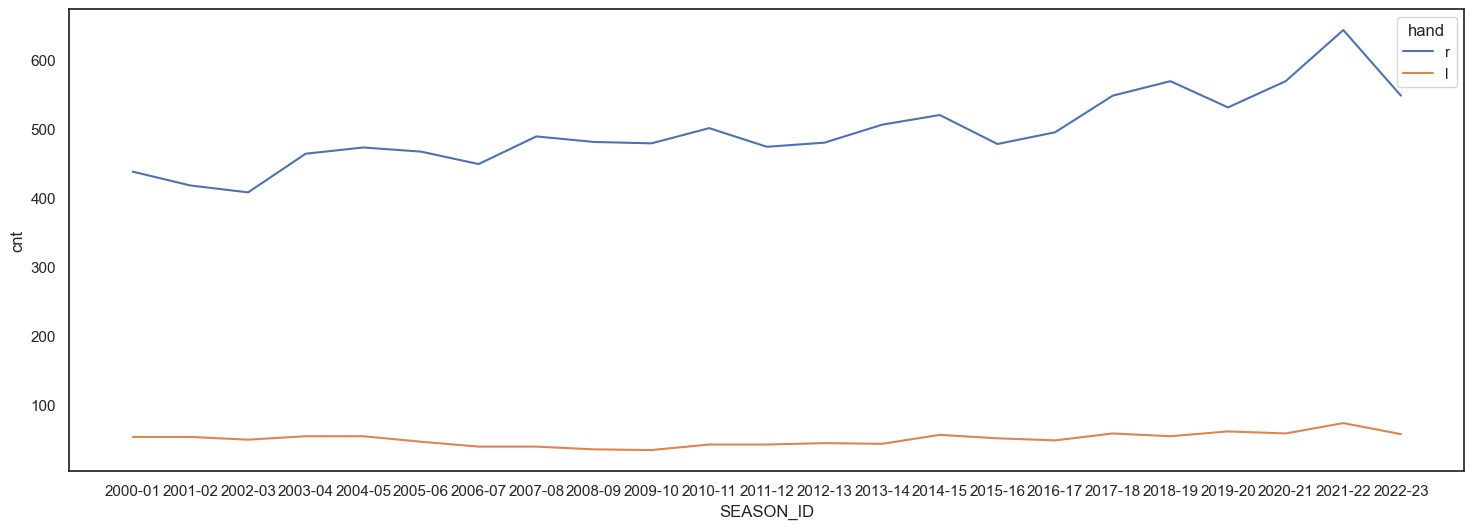

In [7]:
cnt_by_season = df.groupby(['SEASON_ID']).hand.value_counts().to_frame('cnt').reset_index()
plt.figure(figsize=(18, 6))
sns.lineplot(data=cnt_by_season, x='SEASON_ID', y='cnt', hue='hand'); 

In [8]:
color_labels = {'l': 'левши', 'r': 'правши'}
cnt_by_season['hand_text'] = cnt_by_season.hand.map(color_labels)
chart = alt.Chart(cnt_by_season).mark_line().encode(
    x=alt.X('SEASON_ID:N', title='Сезон',
                         axis=alt.Axis(grid=True)),
    y=alt.Y('cnt', title='Количество игроков, участвовавших в регулярке'),
    color=alt.Color('hand_text', title='Игроки')
).properties(
    width=800,
    height=300
)
chart

alt.Chart(...)

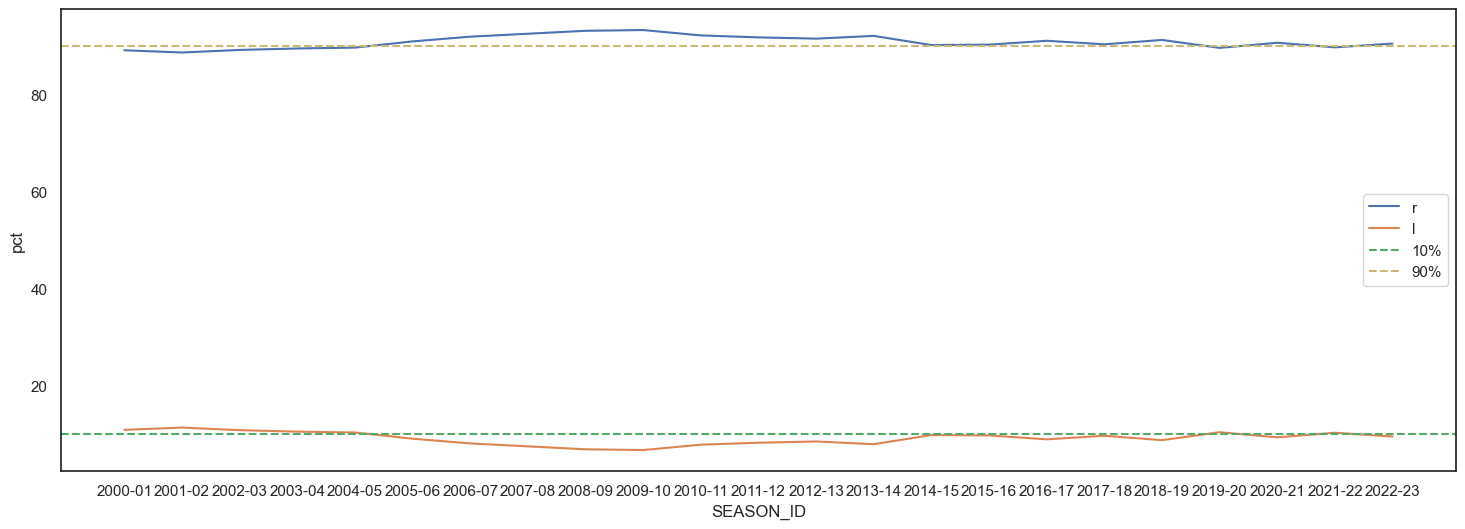

In [9]:
cnt_by_season['pct'] = cnt_by_season.cnt / cnt_by_season.groupby(['SEASON_ID']).cnt.transform('sum') * 100
plt.figure(figsize=(18, 6))
ax = sns.lineplot(data=cnt_by_season, x='SEASON_ID', y='pct', hue='hand')
ax.axhline(y=10, label='10%', linestyle='--', c='g')
ax.axhline(y=90, label='90%', linestyle='--', c='y')
ax.legend();

In [10]:
color_labels = {'l': 'левши', 'r': 'правши'}
cnt_by_season['hand_text'] = cnt_by_season.hand.map(color_labels)
chart = alt.Chart(cnt_by_season).mark_line().encode(
    x=alt.X('SEASON_ID:N', title='Сезон',
                         axis=alt.Axis(grid=True)),
    y=alt.Y('pct', title='Доля игроков, участвовавших в регулярке'),
    color=alt.Color('hand_text', title='Игроки')
).properties(
    width=800,
    height=300
)

chart = chart + alt.Chart(pd.DataFrame({'y': [10]})).mark_rule(strokeDash=[4, 4], color='green').encode(
    y='y'
)
chart = chart + alt.Chart(pd.DataFrame({'y': [90]})).mark_rule(strokeDash=[4, 4], color='yellow').encode(
    y='y'
)
chart

alt.LayerChart(...)

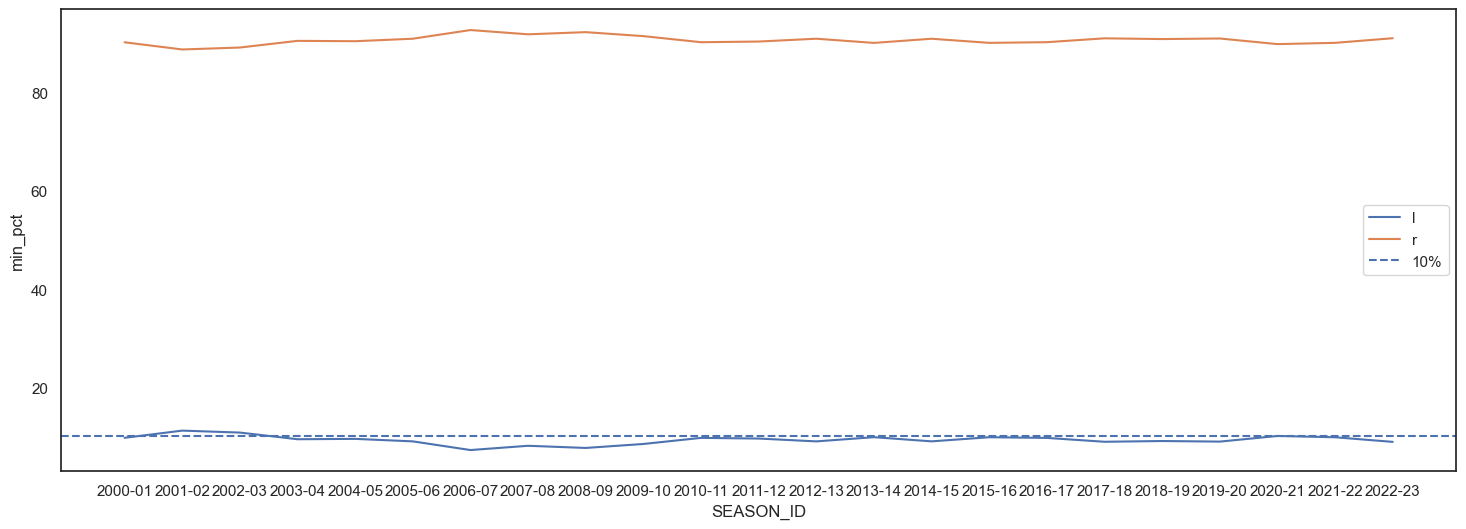

In [11]:
mins_by_season = (
    df
    .groupby(['SEASON_ID', 'hand'])
    .agg({'MIN': 'sum', 'total_min_in_season': 'first'})
    .astype(float)
    .eval('min_pct = MIN / total_min_in_season * 100')
    .reset_index()
)
mins_by_season
plt.figure(figsize=(18, 6))
ax = sns.lineplot(data=mins_by_season, x='SEASON_ID', y='min_pct', hue='hand')
ax.axhline(y=10, label='10%', linestyle='--')
ax.legend();

In [12]:
color_labels = {'l': 'левши', 'r': 'правши'}
mins_by_season['hand_text'] = mins_by_season.hand.map(color_labels)
chart = alt.Chart(mins_by_season).mark_line().encode(
    x=alt.X('SEASON_ID:N', title='Сезон',
                         axis=alt.Axis(grid=True)),
    y=alt.Y('min_pct', title='Доля сыгранных за регулярный сезон минут'),
    color=alt.Color('hand_text', title='Игроки')
).properties(
    width=800,
    height=300
)

chart = chart + alt.Chart(pd.DataFrame({'y': [10]})).mark_rule(strokeDash=[4, 4], color='green').encode(
    y='y'
)
chart = chart + alt.Chart(pd.DataFrame({'y': [90]})).mark_rule(strokeDash=[4, 4], color='yellow').encode(
    y='y'
)
chart

alt.LayerChart(...)

# pts\reb\ast

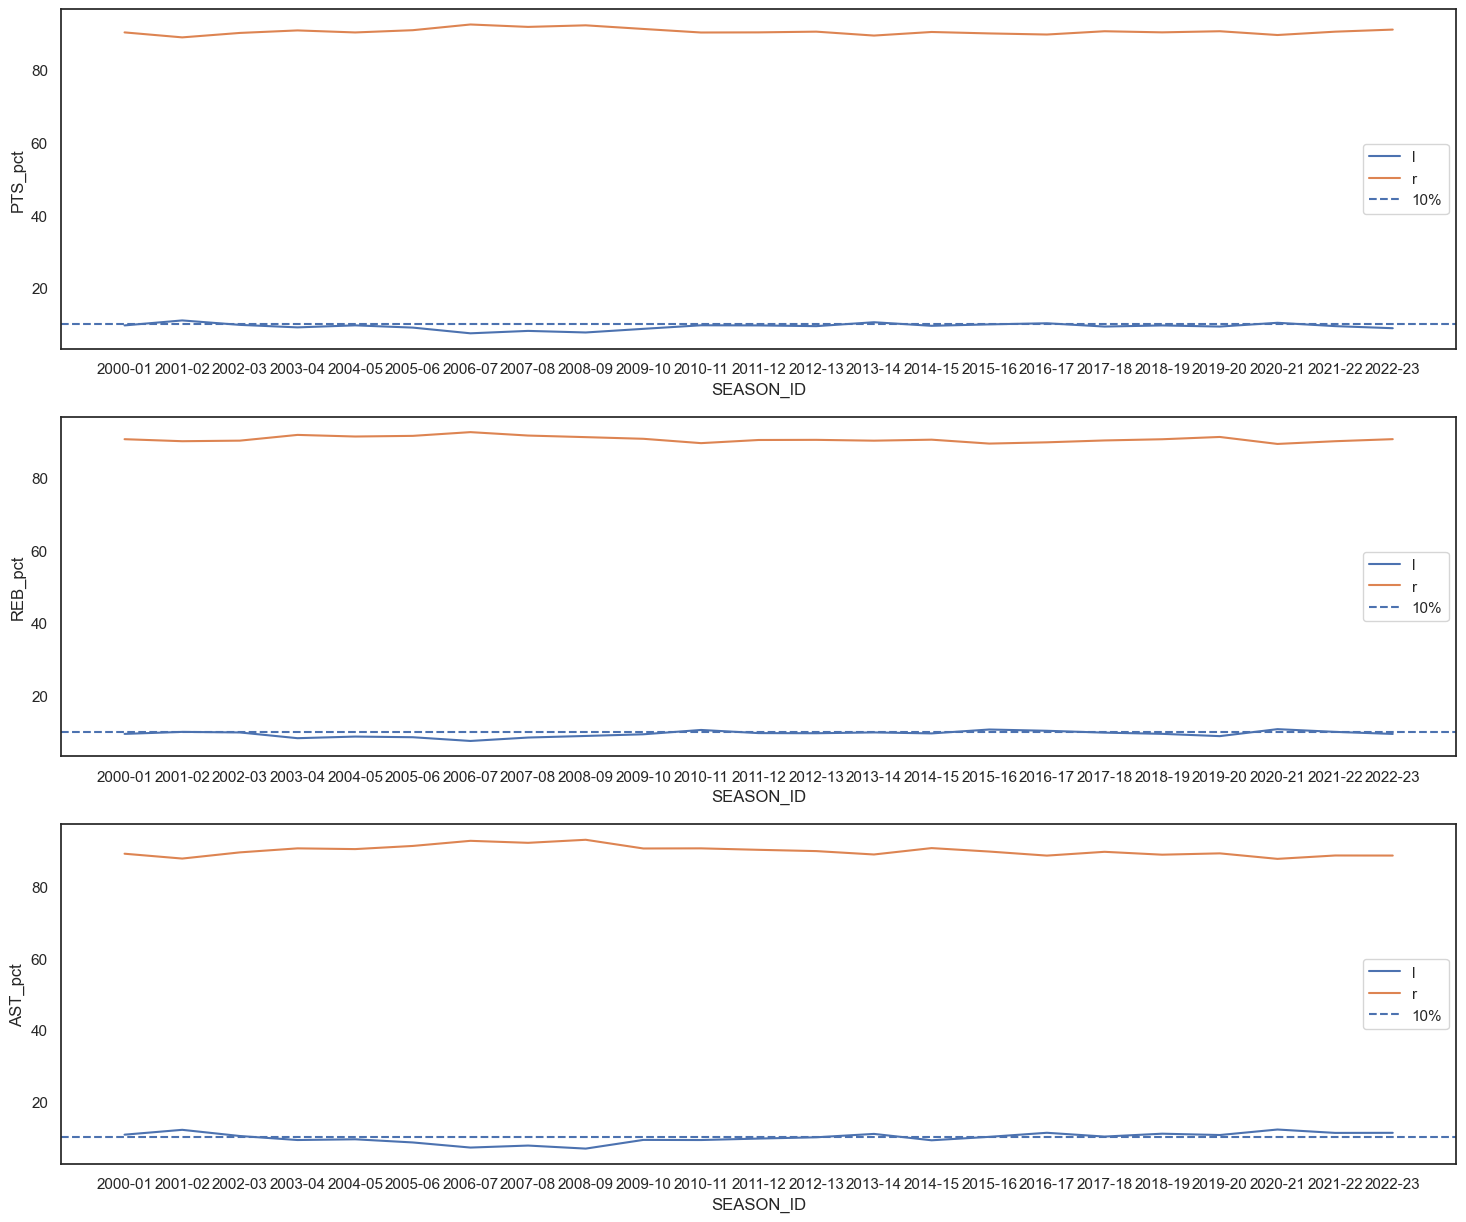

In [13]:
stats_cols = ['PTS', 'REB', 'AST']
stats_by_season = (
    df
    .groupby(['SEASON_ID', 'hand'])
    .agg({_col: 'sum' for _col in stats_cols})
    .astype(float)
    .reset_index()
)
for _col in stats_cols:
    stats_by_season[f'{_col}_pct'] = (
        stats_by_season[_col] / stats_by_season.groupby(['SEASON_ID'])[_col].transform('sum') * 100
    )
stats_by_season
_, axes = plt.subplots(3, 1, figsize=(18, 15))
for _col, ax in zip(stats_cols, axes.flatten()):
    sns.lineplot(data=stats_by_season, x='SEASON_ID', y=f'{_col}_pct', hue='hand', ax=ax)
    ax.axhline(y=10, label='10%', linestyle='--')
    ax.legend();

In [14]:
color_labels = {'l': 'левши', 'r': 'правши'}
stats_by_season['hand_text'] = stats_by_season.hand.map(color_labels)
chart = alt.Chart(stats_by_season).mark_line().encode(
    x=alt.X('SEASON_ID:N', title='Сезон',
                         axis=alt.Axis(grid=True)),
    y=alt.Y('PTS_pct', title='Доля набранных за регулярный сезон очков'),
    color=alt.Color('hand_text', title='Игроки')
).properties(
    width=800,
    height=300
)

chart = chart + alt.Chart(pd.DataFrame({'y': [10]})).mark_rule(strokeDash=[4, 4], color='green').encode(
    y='y'
)
chart = chart + alt.Chart(pd.DataFrame({'y': [90]})).mark_rule(strokeDash=[4, 4], color='yellow').encode(
    y='y'
)
chart

alt.LayerChart(...)

In [15]:
dfs_with_max_by_season = []
for _col in stats_cols:
    max_by_season = (
        df
        .query('hand == "l"')
        .groupby(['SEASON_ID', 'DISPLAY_FIRST_LAST'])
        .agg({_col: 'sum', 'GP': 'sum'})
        .astype(float)
        .reset_index()
        .sort_values([_col, 'SEASON_ID'], ascending=False)
        .drop_duplicates('SEASON_ID', keep='first')
        .sort_values('SEASON_ID')
        .eval(f'{_col}_per_game = {_col} / GP')
        .rename(columns={'DISPLAY_FIRST_LAST': f'{_col}_name', 'GP': f'{_col}_GP'})
    )
    dfs_with_max_by_season.append(max_by_season)
    
df_with_max_by_season = dfs_with_max_by_season[0]
for add_df in dfs_with_max_by_season[1:]:
    df_with_max_by_season = pd.merge(df_with_max_by_season, add_df, 
                                     how='inner', on='SEASON_ID')
# _, axes = plt.subplots(3, 1, figsize=(18, 15))
# for _col, ax in zip(stats_cols, axes.flatten()):
#     sns.lineplot(data=stats_by_season, x='SEASON_ID', y=f'{_col}_pct', hue='hand', ax=ax)
#     ax.axhline(y=10, label='10%', linestyle='--')
#     ax.legend();

df_with_max_by_season

,SEASON_ID,PTS_name,PTS,PTS_GP,PTS_per_game,REB_name,REB,REB_GP,REB_per_game,AST_name,AST,AST_GP,AST_per_game
0,2000-01,Cuttino Mobley,1538.0,79.0,19.468354,Anthony Mason,770.0,80.0,9.625000,Nick Van Exel,600.0,71.0,8.450704
1,2001-02,Jalen Rose,1696.0,83.0,20.433735,David Robinson,647.0,78.0,8.294872,Damon Stoudamire,490.0,75.0,6.533333
2,2002-03,Jalen Rose,1816.0,82.0,22.146341,Troy Murphy,806.0,79.0,10.202532,Jalen Rose,395.0,82.0,4.817073
3,2003-04,Michael Redd,1776.0,82.0,21.658537,Zach Randolph,851.0,81.0,10.506173,Damon Stoudamire,500.0,82.0,6.097561
4,2004-05,Michael Redd,1723.0,75.0,22.973333,Troy Murphy,756.0,70.0,10.800000,Damon Stoudamire,458.0,81.0,5.654321
5,2005-06,Michael Redd,2028.0,80.0,25.350000,Troy Murphy,743.0,74.0,10.040541,Lamar Odom,443.0,80.0,5.537500
6,2006-07,Zach Randolph,1608.0,68.0,23.647059,Andris Biedrins,762.0,82.0,9.292683,Delonte West,304.0,69.0,4.405797
7,2007-08,Michael Redd,1632.0,72.0,22.666667,Lamar Odom,819.0,77.0,10.636364,Manu Ginobili,332.0,74.0,4.486486
8,2008-09,Chris Bosh,1746.0,77.0,22.675325,David Lee,951.0,81.0,11.740741,Mike Conley,354.0,82.0,4.317073
9,2009-10,Zach Randolph,1681.0,81.0,20.753086,Zach Randolph,950.0,81.0,11.728395,Brandon Jennings,470.0,82.0,5.731707


In [16]:
col2align = {'PTS': 'left', 'REB': 'center', 'AST': 'right'}
col2name = {'PTS': 'очков', 'REB': 'подборов', 'AST': 'передач'}
def make_max_df(col):
    return (
        df_with_max_by_season
        [['SEASON_ID', col, f'{col}_name']]
        .rename(columns={col: '_val', f'{col}_name': '_name'})
        .copy()
        .eval(f'_stat = "{col2name[col]}"')
        .eval(f'_align = "{col2align[col]}"')
    )
_df = pd.concat([make_max_df(_col) for _col in stats_cols])
_df

,SEASON_ID,_val,_name,_stat,_align
0,2000-01,1538.0,Cuttino Mobley,очков,left
1,2001-02,1696.0,Jalen Rose,очков,left
2,2002-03,1816.0,Jalen Rose,очков,left
3,2003-04,1776.0,Michael Redd,очков,left
4,2004-05,1723.0,Michael Redd,очков,left
...,...,...,...,...,...
18,2018-19,610.0,Ben Simmons,передач,right
19,2019-20,512.0,James Harden,передач,right
20,2020-21,475.0,James Harden,передач,right
21,2021-22,667.0,James Harden,передач,right


In [17]:
chart = alt.Chart(_df)
(
    (
    chart.mark_line().encode(
        x=alt.X('SEASON_ID:N', title='Сезон',
                             axis=alt.Axis(grid=True)),
        y=alt.Y('_val', title='Всего за регулярку'),
        color=alt.Color('_stat', legend=alt.Legend(title='Всего за регулярку'))
    ).properties(
        width=800,
        height=800
    )
)
    +
    (
    chart.mark_text(dx=5, angle=305, align='left').encode(
        x=alt.X('SEASON_ID:N', title='Сезон',
                             axis=alt.Axis(grid=True)),
        y=alt.Y('_val'),
        text=alt.Text('_name'), 
        color='_stat',
    )
)
)

alt.LayerChart(...)

In [18]:
# chart = alt.Chart(df_with_max_by_season)
# _plots = []
# for _col, _align, _dx, _color in zip(stats_cols, 
#                                      ['left', 'center', 'right'], 
#                                      [10, 0, -10],
#                                      ['Blue', 'Orange', 'Gray']):
#     _plots.append(
#         chart.mark_line(color=_color).encode(
#             x=alt.X('SEASON_ID:N', title='Сезон',
#                                  axis=alt.Axis(grid=True)),
#             y=alt.Y(_col, title='Всего за регулярку'),
#             legend=alt.Legend(title=_color)
#         ).properties(
#             width=800,
#             height=800
#         )
#     )
#     _plots.append(
#         chart.mark_text(align=_align, dx=_dx, angle=270, color=_color).encode(
#             x=alt.X('SEASON_ID:N', title='Сезон',
#                                  axis=alt.Axis(grid=True)),
#             y=alt.Y(_col),
#             text=alt.Text(f'{_col}_name'), 
#         )
#     )
# sum(_plots[1:], start=_plots[0])

# fg\3pt\ft pct

In [19]:
shoot_cols = ['FG', 'FG3', 'FT']
shoot_agg_dict = {}
for _col in shoot_cols:
    shoot_agg_dict[_col + 'A'] = 'sum'
    shoot_agg_dict[_col + 'M'] = 'sum'
shoot_agg_dict['hand'] = 'first'
pct_by_season = (
    df
    .groupby(['SEASON_ID', 'DISPLAY_FIRST_LAST'])
    .agg(shoot_agg_dict)
#     .astype(float)
    .reset_index()
)
for _col in shoot_cols:
    pct_by_season[f'{_col}_PCT'] = (
        pct_by_season[f'{_col}M'].fillna(0).astype(float) 
        / pct_by_season[f'{_col}A'].fillna(0).astype(float)
    ).fillna(0)
pct_by_season.head()

,SEASON_ID,DISPLAY_FIRST_LAST,FGA,FGM,FG3A,FG3M,FTA,FTM,hand,FG_PCT,FG3_PCT,FT_PCT
0,2000-01,A.C. Green,324,144,6.0,0.0,111,79,r,0.444444,0.000000,0.711712
1,2000-01,A.J. Guyton,192,78,69.0,27.0,18,15,r,0.406250,0.391304,0.833333
2,2000-01,Aaron McKie,714,338,170.0,53.0,194,149,r,0.473389,0.311765,0.768041
3,2000-01,Aaron Williams,650,297,2.0,0.0,310,244,l,0.456923,0.000000,0.787097
4,2000-01,Adam Keefe,159,64,3.0,1.0,63,39,r,0.402516,0.333333,0.619048


In [20]:
MIN_ATTEMPTS_THRESHOLD = 50
median_pct_by_hand = pd.concat([
    (
        pct_by_season
        .query(f'{_col}A >= {MIN_ATTEMPTS_THRESHOLD}')
        .groupby(['SEASON_ID', 'hand'])
        [f'{_col}_PCT'].mean()
    ) 
    for _col in shoot_cols], axis=1).reset_index()
median_pct_by_hand
# _, axes = plt.subplots(3, 1, figsize=(18, 15))
# for _col, ax in zip(shoot_cols, axes.flatten()):
#     sns.lineplot(data=median_pct_by_hand, x='SEASON_ID', y=f'{_col}_PCT', hue='hand', ax=ax)
# #     ax.axhline(y=10, label='10%', linestyle='--')
#     ax.legend();

,SEASON_ID,hand,FG_PCT,FG3_PCT,FT_PCT
0,2000-01,l,0.428349,0.359819,0.741506
1,2000-01,r,0.434759,0.350116,0.741906
2,2001-02,l,0.445852,0.356291,0.750654
3,2001-02,r,0.435510,0.348204,0.740448
4,2002-03,l,0.433953,0.362304,0.759592
5,2002-03,r,0.436474,0.346473,0.740492
6,2003-04,l,0.420418,0.349550,0.760750
7,2003-04,r,0.432967,0.348348,0.744731
8,2004-05,l,0.424286,0.361390,0.786126
9,2004-05,r,0.442308,0.346720,0.746520


In [23]:
def make_pct_df(col):
    return (
        median_pct_by_hand
        [['SEASON_ID', 'hand', f'{col}_PCT']]
        .rename(columns={f'{col}_PCT': '_val'})
        .copy()
        .eval(f"_stat = '{col}%'")
#         .eval(f'_align = "{col2align[col]}"')
    )
_df_pct = pd.concat([make_pct_df(_col) for _col in shoot_cols])
_df_pct

,SEASON_ID,hand,_val,_stat
0,2000-01,l,0.428349,FG%
1,2000-01,r,0.434759,FG%
2,2001-02,l,0.445852,FG%
3,2001-02,r,0.435510,FG%
4,2002-03,l,0.433953,FG%
...,...,...,...,...
41,2020-21,r,0.776160,FT%
42,2021-22,l,0.729077,FT%
43,2021-22,r,0.774196,FT%
44,2022-23,l,0.726398,FT%


In [24]:
color_labels = {'l': 'левши', 'r': 'правши'}
_df_pct['hand_text'] = _df_pct.hand.map(color_labels)
chart = alt.Chart(_df_pct)
(
    chart.mark_line().encode(
        x=alt.X('SEASON_ID:N', title='Сезон',
                             axis=alt.Axis(grid=True)),
        y=alt.Y('_val', title='Средняя точность за регулярку', scale=alt.Scale(zero=False)),
        color=alt.Color('_stat', legend=alt.Legend(title='Точность')),
        strokeDash=alt.Color('hand_text', legend=alt.Legend(title='Игроки')),
    ).properties(
        width=800,
        height=800
    )
)

alt.Chart(...)

## last season stat test

In [25]:
# %pip install scipy

In [26]:
import scipy.stats as stats

def compare_samples(sample1, sample2, min_nunique=5, alpha = 0.05):
    # Print mean, median, and standard deviation for both samples
    print(f"Sample 1: {len(sample1)}")
    print(f"Mean: {np.mean(sample1):.2f}")
    print(f"Median: {np.median(sample1):.2f}")
    print(f"Standard Deviation: {np.std(sample1):.2f}\n")
    
    print(f"Sample 2: {len(sample2)}")
    print(f"Mean: {np.mean(sample2):.2f}")
    print(f"Median: {np.median(sample2):.2f}")
    print(f"Standard Deviation: {np.std(sample2):.2f}\n")
    
    # Check if samples have fewer than 5 distinct values
    if len(set(sample1)) < min_nunique and len(set(sample2)) < min_nunique:
        print(f"Both samples have less than {min_nunique} distinct values. Running Chi-Squared test.")
        # if both samples have few distinct values, use chi-squared test
        freq1 = np.array([(sample1 == val).sum() for val in set(sample1)])
        freq2 = np.array([(sample2 == val).sum() for val in set(sample2)])
        _, pvalue, _, _ = stats.chi2_contingency([freq1, freq2])
        print(f"Chi-squared test p-value: {pvalue}")
    else:
        # Check for normality of each sample
        _, p1 = stats.normaltest(sample1)
        _, p2 = stats.normaltest(sample2)

        print(f"Sample 1: {'Normal' if p1 > alpha else 'Not normal'} (p-value: {p1:.4f})")
        print(f"Sample 2: {'Normal' if p2 > alpha else 'Not normal'} (p-value: {p2:.4f})\n")

        # Run t-test if both samples are normal
        if p1 > alpha and p2 > alpha:
            test_result = stats.ttest_ind(sample1, sample2, equal_var=False)
            print("Running Independent Samples t-test")
            print(f"Difference of means: {np.mean(sample1) - np.mean(sample2):.2f}")
            print(f"Ratio of difference to standard deviation: {(np.mean(sample1) - np.mean(sample2)) / np.std(np.concatenate([sample1, sample2])):.2f}")
            print(f"Test statistic: {test_result.statistic:.2f}, p-value: {test_result.pvalue:.2f}\n")
        else:
            # Otherwise, run Mann-Whitney U test
            test_result = stats.mannwhitneyu(sample1, sample2)
            print("Running Mann-Whitney U test")
            print(f"Difference of medians: {np.median(sample1) - np.median(sample2):.2f}")
            print(f"Test statistic: {test_result.statistic:.2f}, p-value: {test_result.pvalue:.2f}\n")
        # calculate difference of means and its ratio to standard deviation
        diff_means = np.mean(sample1) - np.mean(sample2)
        ratio_std = diff_means / np.sqrt((np.std(sample1)**2 + np.std(sample2)**2) / 2)
        print(f"Difference of means: {diff_means}")
        print(f"Ratio of difference of means to standard deviation: {ratio_std}")
        
l_fg_pct = df.query("SEASON_ID == '2022-23' and hand == 'l'").FG_PCT.to_list()#values
r_fg_pct = df.query("SEASON_ID == '2022-23' and hand == 'r'").FG_PCT.to_list()#values
compare_samples(l_fg_pct, r_fg_pct)

Sample 1: 57
Mean: 0.49
Median: 0.47
Standard Deviation: 0.14

Sample 2: 547
Mean: 0.46
Median: 0.45
Standard Deviation: 0.12

Sample 1: Not normal (p-value: 0.0198)
Sample 2: Not normal (p-value: 0.0000)

Running Mann-Whitney U test
Difference of medians: 0.01
Test statistic: 17937.00, p-value: 0.06

Difference of means: 0.029772314698996105
Ratio of difference of means to standard deviation: 0.23195538971829543


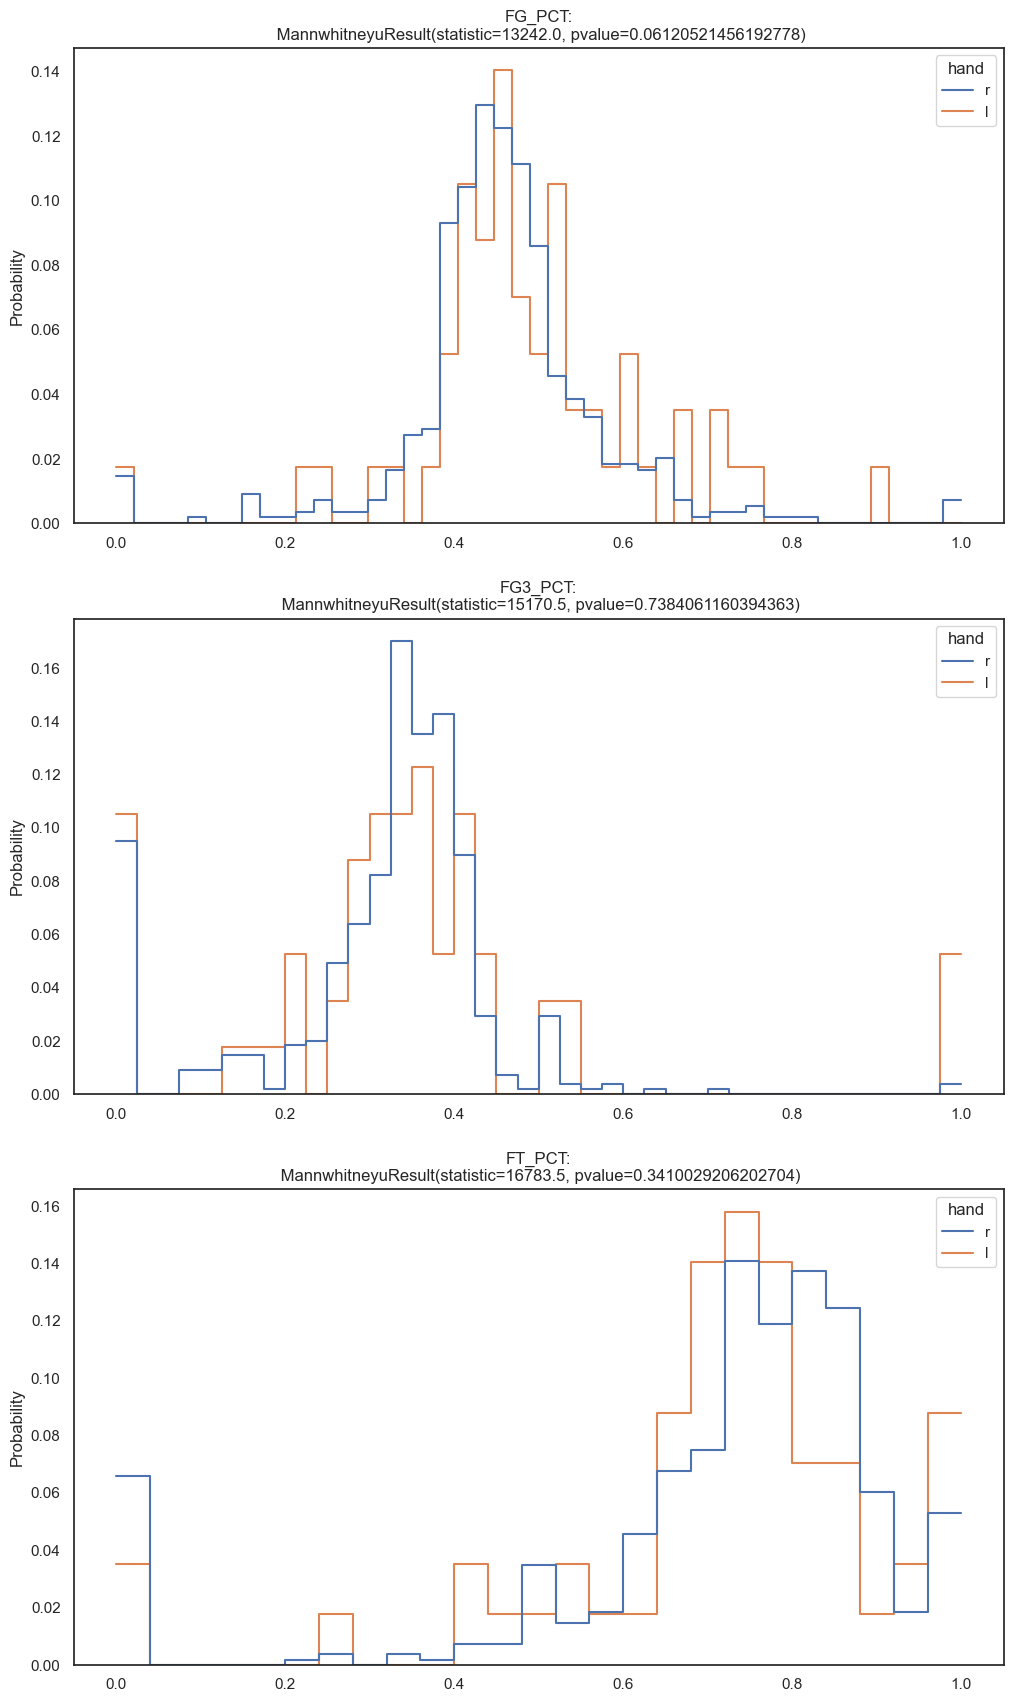

In [27]:
def plot_cmp_distributions(df, cols_to_plot, cmp_col):
    nrows=len(cols_to_plot)
    fig, axs = plt.subplots(nrows=nrows, figsize=(12, 7 * nrows))
    for i, col in enumerate(cols_to_plot):
        sns.histplot(data=df, x=col, hue=cmp_col, element='step', 
                     common_norm=False,
                     fill=False, stat='probability', ax=axs[i])

        cmp_values = df[cmp_col].unique()
        mw_test = stats.mannwhitneyu(
            df[df[cmp_col] == cmp_values[0]][col].dropna().tolist(),
            df[df[cmp_col] == cmp_values[1]][col].dropna().tolist(),
            alternative='two-sided'
               )
        axs[i].set_title(f"{col}:\n {mw_test}")
        axs[i].set_xlabel(None)
        
plot_cmp_distributions(df.query("SEASON_ID == '2022-23'"), 
                       cols_to_plot=['FG_PCT', 'FG3_PCT', 'FT_PCT'], 
                       cmp_col='hand')

# fouls per 30 min

Долго медитировал над: если фолы у 2х групп одинаковы, то и заработанные фолы тоже должны совпадать. Можно ли это доказать формально?

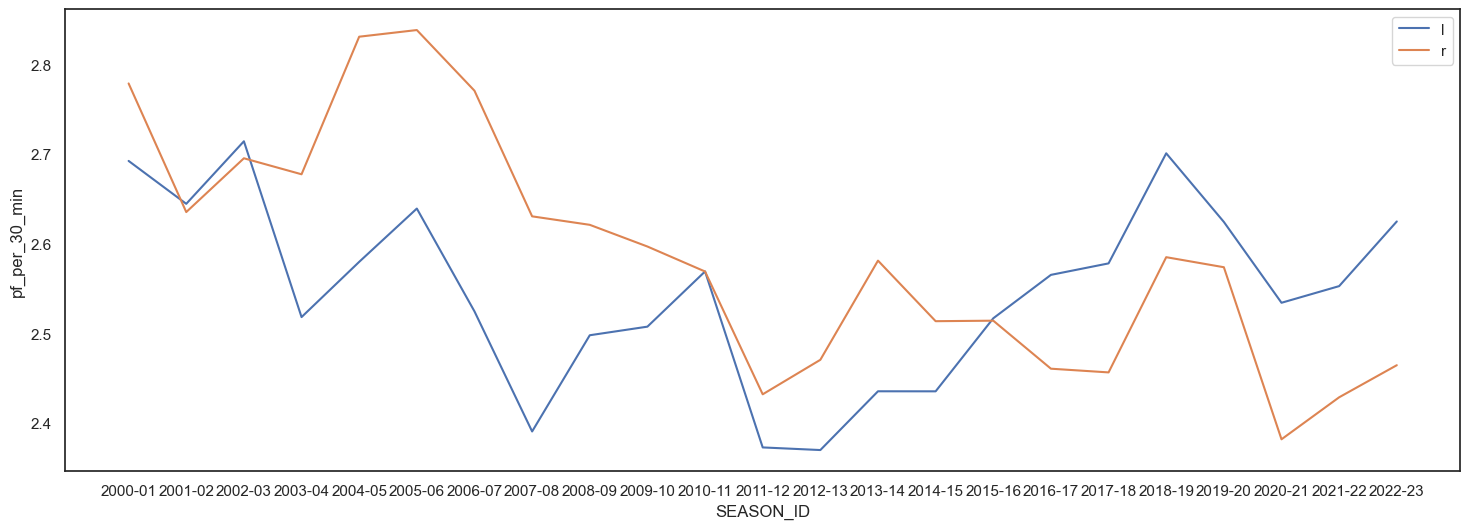

In [28]:
fouls_by_season = (
    df
    .groupby(['SEASON_ID', 'hand'])
    .agg({'MIN': 'sum', 'PF': 'sum'})
    .astype(float)
    .eval('pf_per_30_min = PF / MIN * 30')
    .reset_index()
)
fouls_by_season
plt.figure(figsize=(18, 6))
ax = sns.lineplot(data=fouls_by_season, x='SEASON_ID', y='pf_per_30_min', hue='hand')
# ax.axhline(y=10, label='10%', linestyle='--')
ax.legend();

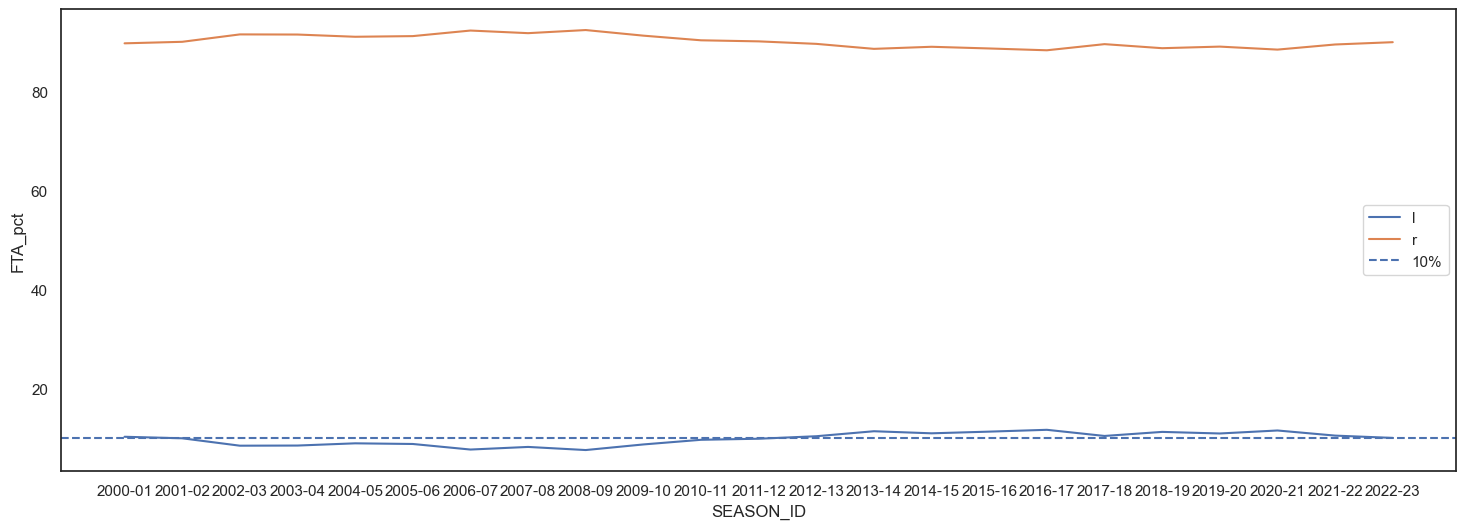

In [29]:
ft_by_season = (
    df
    .groupby(['SEASON_ID', 'hand'])
    .agg({'MIN': 'sum', 'FTA': 'sum'})
    .astype(float)
    .eval('fta_per_30_min = FTA / MIN * 30')
    .reset_index()
)
for _col in ['FTA']:
    ft_by_season[f'{_col}_pct'] = (
        ft_by_season[_col] / ft_by_season.groupby(['SEASON_ID'])[_col].transform('sum') * 100
    )
ft_by_season
plt.figure(figsize=(18, 6))
ax = sns.lineplot(data=ft_by_season, x='SEASON_ID', y='FTA_pct', hue='hand')
ax.axhline(y=10, label='10%', linestyle='--')
ax.legend();

In [30]:
color_labels = {'l': 'левши', 'r': 'правши'}
ft_by_season['hand_text'] = ft_by_season.hand.map(color_labels)
chart = alt.Chart(ft_by_season).mark_line().encode(
    x=alt.X('SEASON_ID:N', title='Сезон',
                         axis=alt.Axis(grid=True)),
    y=alt.Y('FTA_pct', title='Доля штрафных бросков за регулярный сезон'),
    color=alt.Color('hand_text', title='Игроки')
).properties(
    width=800,
    height=300
)

chart = chart + alt.Chart(pd.DataFrame({'y': [10]})).mark_rule(strokeDash=[4, 4], color='green').encode(
    y='y'
)
chart = chart + alt.Chart(pd.DataFrame({'y': [90]})).mark_rule(strokeDash=[4, 4], color='yellow').encode(
    y='y'
)
chart

alt.LayerChart(...)

# last season height\weight\age

<Axes: >

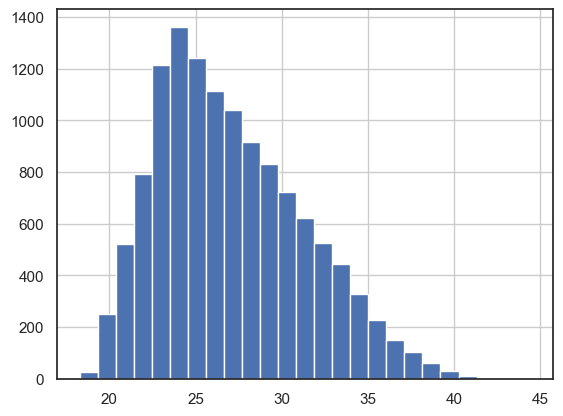

In [31]:
from functools import lru_cache

@lru_cache()
def mid_season(season):
    year = int(season.split('-')[0]) + 1
    return pd.to_datetime(f'{year}-02-01')

df['mid_season'] = df.SEASON_ID.map(mid_season)

df['calc_age'] = np.abs((df.mid_season - pd.to_datetime(df.BIRTHDATE)) / np.timedelta64(1, 'Y'))
df.calc_age.hist(bins=25)

In [32]:
def feet2cm(feet_str):
    s = str(feet_str).split('-')
    if len(s) == 1:
        return np.NaN
    f, i = [int(sub) for sub in s]
    return (f*12 + i) * 2.54

def lbs2kg(lbs_val):
    if lbs_val in ['', ' ']:
        return np.NaN
    if pd.isna(lbs_val):
        return np.NaN
    return int(lbs_val) * 0.453

df['h'] = df.HEIGHT.map(feet2cm)
df['w'] = df.WEIGHT.map(lbs2kg)

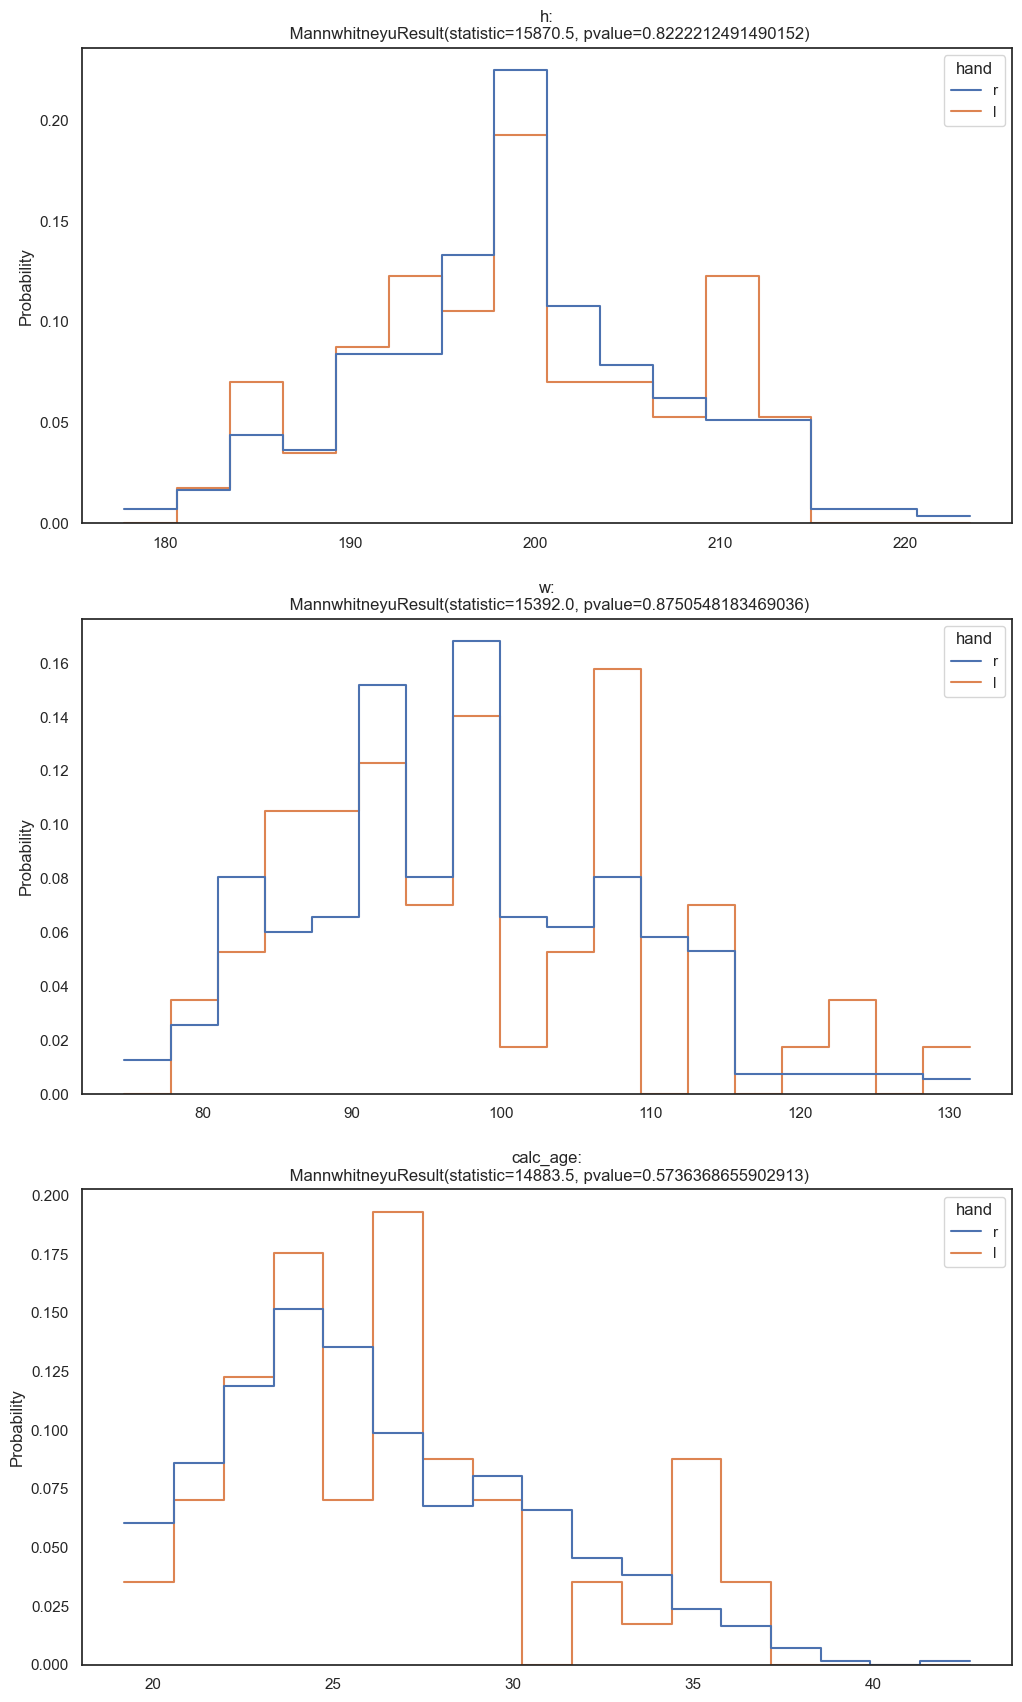

In [33]:
plot_cmp_distributions(df.query("SEASON_ID == '2022-23'"), 
                       cols_to_plot=['h', 'w', 'calc_age'], 
                       cmp_col='hand')

In [34]:
df_last_season = df.query("SEASON_ID == '2022-23'").copy()
color_labels = {'l': 'левши', 'r': 'правши'}
df_last_season['hand_text'] = df_last_season.hand.map(color_labels)
hist1 = alt.Chart(df_last_season).transform_density(
    'h',
    as_=['h', 'density'],
    groupby=['hand_text']
).mark_area(filled=False).encode(
    alt.X('h', bin=alt.Bin(step=2.54), title='Рост'),
    alt.Y('density:Q', stack=None, title='Вероятность'),
    alt.Color('hand_text', legend=alt.Legend(title='Игроки'))
).properties(
    width=600,
    height=200
)


hist1

alt.Chart(...)

# most left teams

In [35]:
mins_by_team = (
    df
    .query("SEASON_ID == '2022-23'")
    .groupby(['TEAM_ABBREVIATION_x', 'hand'])
    .agg({'MIN': 'sum', 'PLAYER_ID': 'nunique'})
    .astype(float)
#     .eval('min_pct = MIN / total_min_in_season * 100')
    .unstack(-1)
    .fillna(0)
)
mins_by_team['MIN_PCT_L'] = mins_by_team[('MIN', 'l')] / mins_by_team['MIN'].sum(axis=1) * 100
mins_by_team.sort_values('MIN_PCT_L')

MIN          PLAYER_ID        MIN_PCT_L
hand                      l        r         l     r           
TEAM_ABBREVIATION_x                                            
ATL                     0.0  19856.0       0.0  20.0   0.000000
BOS                     0.0  19980.0       0.0  18.0   0.000000
MIA                     0.0  19805.0       0.0  20.0   0.000000
DAL                     0.0  19932.0       0.0  23.0   0.000000
CLE                    10.0  19870.0       1.0  17.0   0.050302
ORL                    30.0  19750.0       1.0  19.0   0.151668
IND                   228.0  19525.0       1.0  19.0   1.154255
GSW                   374.0  19456.0       2.0  16.0   1.886031
SAS                   443.0  19414.0       1.0  22.0   2.230951
WAS                   464.0  19291.0       2.0  21.0   2.348772
OKC                   555.0  19299.0       1.0  18.0   2.795406
DEN                   586.0  19168.0       1.0  17.0   2.966488
TOR                   795.0  19013.0       1.0  19.0   4.013530
MEM                   871.0  18869.0       3.0  15.0   4.412361
PHX                  1029.0  18750.0       2.0  18.0   5.202487
POR                  1151.0  18344.0       3.0  18.0   5.904078
MIL                  1344.0  18487.0       3.0  18.0   6.777268
LAL                  1679.0  18200.0       3.0  21.0   8.446099
CHI                  1716.0  18188.0       3.0  15.0   8.621383
LAC                  1807.0  18024.0       3.0  18.0   9.111996
PHI                  2135.0  17744.0       1.0  20.0  10.739977
MIN                  2531.0  17301.0       2.0  18.0  12.762203
UTA                  2529.0  17274.0       2.0  21.0  12.770792
HOU                  2729.0  17025.0       3.0  15.0  13.814924
NOP                  2907.0  16949.0       2.0  15.0  14.640411
DET                  3749.0  16055.0       3.0  19.0  18.930519
CHA                  4113.0  15720.0       3.0  16.0  20.738164
BKN                  4304.0  15392.0       3.0  21.0  21.852153
SAC                  5178.0  14653.0       3.0  17.0  26.110635
NYK                  9220.0  10736.0       4.0  13.0  46.201644

- CLE:
    - dylan windler 10 min https://www.basketball-reference.com/players/w/windldy01.html
- ORL
    - Jay Scrubb 30 min https://www.basketball-reference.com/players/s/scrubja01.html
    - PER 14+ , eFG 80+%
- NYK:
    - Julius Randle, RJ Barrett, Jalen Brunson, Isaiah Hartenstein 
    - Tom Thibodeau is left handed?
    - only 17 players in season - least of all teams

In [36]:
(
    df
    .query("SEASON_ID == '2022-23' and TEAM_ABBREVIATION_x == 'ORL'")
    .sort_values(['hand', 'MIN'], ascending=[True, False])
)

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID_x,TEAM_ABBREVIATION_x,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,total_min_in_season,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID_y,TEAM_NAME,TEAM_ABBREVIATION_y,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG,id,full_name,first_name,last_name,is_active,born_year_x,full_name_year,basketref_name_year,basketref_name_year_lower,player_name,player_link,player_pos,player_height,player_weight,player_born,player_college,from_year,to_year,fpath,cnt_shoots_elements,shoots,hand,born_year_y,name_year,player_name_year_lower,mid_season,calc_age,h,w
8616,1630206,2022-23,00,1610612753,ORL,22.0,2,0.0,30.0,5,7,0.714,2.0,2.0,1.0,1,2,0.5,0.0,6.0,6.0,1,2.0,0.0,3.0,2,13,594547.0,1630206,Jay,Scrubb,Jay Scrubb,"Scrubb, Jay",J. Scrubb,jay-scrubb,2000-09-01T00:00:00,None,USA,John A. Logan/USA,6-5,220,2,,Guard,Inactive,Y,0,,,,,jay_scrubb,2020,2022,Y,Y,Y,2020,2,55,N,1630206,Jay Scrubb,Jay,Scrubb,False,2000,Jay Scrubb - 2000,Jay Scrubb - 2000,jay scrubb - 2000,Jay Scrubb,https://www.basketball-reference.com/players/s...,G-F,6-5,220,"September 1, 2000",John A. Logan College,2021,2023,data/players/scrubja01.html,1,\n left\n,l,2000,Jay Scrubb - 2000,jay scrubb - 2000,2023-02-01,22.432877,195.58,99.660
909,1630532,2022-23,00,1610612753,ORL,21.0,80,80.0,2609.0,542,1118,0.485,130.0,360.0,0.361,271,322,0.842,70.0,259.0,329.0,283,77.0,17.0,167.0,183,1485,594547.0,1630532,Franz,Wagner,Franz Wagner,"Wagner, Franz",F. Wagner,franz-wagner,2001-08-27T00:00:00,Michigan,Germany,Michigan/Germany,6-10,220,1,22,Forward,Active,Y,1610612753,Magic,ORL,magic,Orlando,franz_wagner,2021,2022,N,Y,Y,2021,1,8,N,1630532,Franz Wagner,Franz,Wagner,True,2001,Franz Wagner - 2001,Franz Wagner - 2001,franz wagner - 2001,Franz Wagner,https://www.basketball-reference.com/players/w...,G-F,6-9,225,"August 27, 2001",Michigan,2022,2023,data/players/wagnefr01.html,1,\n right\n,r,2001,Franz Wagner - 2001,franz wagner - 2001,2023-02-01,21.446575,208.28,99.660
2418,1631094,2022-23,00,1610612753,ORL,20.0,72,72.0,2430.0,479,1122,0.427,85.0,285.0,0.298,394,534,0.738,84.0,413.0,497.0,269,60.0,39.0,200.0,160,1437,594547.0,1631094,Paolo,Banchero,Paolo Banchero,"Banchero, Paolo",P. Banchero,paolo-banchero,2002-11-12T00:00:00,Duke,USA,Duke/USA,6-10,250,0,5,Forward,Active,Y,1610612753,Magic,ORL,magic,Orlando,paolo_banchero,2022,2022,N,Y,Y,2022,1,1,N,1631094,Paolo Banchero,Paolo,Banchero,True,2002,Paolo Banchero - 2002,Paolo Banchero - 2002,paolo banchero - 2002,Paolo Banchero,https://www.basketball-reference.com/players/b...,F,6-10,250,"November 12, 2002",Duke,2023,2023,data/players/banchpa01.html,1,\n right\n,r,2002,Paolo Banchero - 2002,paolo banchero - 2002,2023-02-01,20.235616,208.28,113.250
6592,1628365,2022-23,00,1610612753,ORL,25.0,60,60.0,1778.0,349,679,0.514,27.0,87.0,0.31,112,143,0.783,69.0,165.0,234.0,341,87.0,26.0,139.0,131,837,594547.0,1628365,Markelle,Fultz,Markelle Fultz,"Fultz, Markelle",M. Fultz,markelle-fultz,1998-05-29T00:00:00,Washington,USA,Washington/USA,6-3,209,3,20,Guard,Active,Y,1610612753,Magic,ORL,magic,Orlando,markelle_fultz,2017,2020,N,Y,Y,2017,1,1,NaN,1628365,Markelle Fultz,Markelle,Fultz,True,1998,Markelle Fultz - 1998,Markelle Fultz - 1998,markelle fultz - 1998,Markelle Fultz,https://www.basketball-reference.com/players/f...,G,6-3,209,"May 29, 1998",Washington,2018,2023,data/players/fultzma01.html,1,\n right\n,r,1998,Markelle Fultz - 1998,markelle fultz - 1998,2023-02-01,24.695890,190.50,94.677
923,1628976,2022-23,00,1610612753,ORL,24.0,57,54.0,1690.0,322,613,0.525,80.0,225.0,0.356,144,195,0.738,120.0,377.0,497.0,132,30.0,33.0,106.0,159,868,594547.0,1628976,Wendell,Carter Jr.,Wendell Carter J